<a href="https://colab.research.google.com/github/shampulooki/FirstRepo/blob/master/LSTTM_TS_CL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir


In [3]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
# from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [6]:
# df1 = pd.read_csv('MovementAAL_RSS_1.csv')
# df2 = pd.read_csv('MovementAAL_RSS_2.csv')
# fix random seed for reproducibility
numpy.random.seed(7)

In [8]:
# load the dataset
dataframe = pandas.read_csv('airline_passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [9]:
dataframe.head()

,passengers
0,112
1,118
2,132
3,129
4,121


In [12]:
# df2.head()
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [14]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [18]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0511 - 2s/epoch - 20ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0260 - 226ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0199 - 245ms/epoch - 3ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0181 - 295ms/epoch - 3ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0169 - 256ms/epoch - 3ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0160 - 268ms/epoch - 3ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0151 - 198ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0142 - 135ms/epoch - 1ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0131 - 131ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0122 - 127ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0110 - 128ms/epoch - 1ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0099 - 128ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0085 - 126ms/epoch - 1ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0073 - 130ms/epoch - 1ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0060 - 126ms/epoch - 1ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0049 - 141ms/epoc

In [20]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.09 RMSE


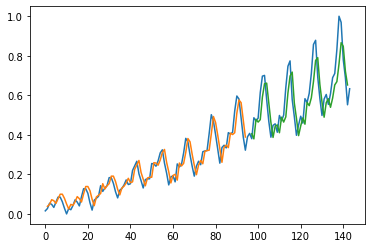

In [21]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()